In [340]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import json
from sklearn import datasets
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [341]:
jakes_data_csv = "../data/data.csv"
data = pd.read_csv(jakes_data_csv)
data

,title,tagline,responses,tech,is_winner,like_count,members,photo_url,has_video,comment_count
0,TRAVIS-Traffic Realtime Assistant Via Internet...,Travis is Traffic &amp; Road safety assistance...,"[3555, ' ', ""Travis (Traffic Realtime Assistan...","['android', 'android-studio', 'photoshop', 'fi...",True,558,['prasang7'],https://challengepost-s3-challengepost.netdna-...,True,213
1,Class Diagrams for Bitbucket,"Making class diagrams is a pain, so we automat...","[3505, ' ', 'This Bitbucket add-on allows you ...","['scala', 'javascript', 'bitbucket', 'atlassia...",True,612,"['dpashkevich', 'gregghz']",https://challengepost-s3-challengepost.netdna-...,True,167
2,ParkKing,ParkKing helps foster culture of parking disci...,"[5457, 'Being a citizen of Indore, lack of par...","['android', 'php', 'mysql', 'javascript', 'htm...",True,491,"['poojamaheshwari', 'neerajpatel76', 'aishwary...",https://challengepost-s3-challengepost.netdna-...,True,141
3,Lucidchart OnPrem for Confluence Server,Others are going cloud—we're taking our top we...,"[4640, ""Over 300+ customers have requested an ...","['java', 'javascript', 'google-closure-compile...",True,653,"['blainefarr', 'dpashkevich', 'robchristiansen...",https://challengepost-s3-challengepost.netdna-...,True,46
4,Cronforce Time Tracking for Jira,Save valuable developer time and capture time ...,"[2557, ""Normally developers keep track of thei...","['jira', 'javascript', 'angular.js', 'html5', ...",False,626,"['cronforce', 'ebcresende', 'jcosta', 'migvent...",https://challengepost-s3-challengepost.netdna-...,False,37
5,CoTaxi,Changeant nos habitudes de déplacement pour u...,"[1137, 'taxi problems in Morroco ', 'CoTaxi al...","['android', 'mysql', 'json', 'google-maps', 'g...",False,290,['co-taxi'],https://firefly-challengepost.netdna-ssl.com/u...,True,172
6,TRAVIS-Traffic Realtime Assistant Via Internet...,Travis is Traffic &amp; Road safety assistance...,"[3555, ' ', ""Travis (Traffic Realtime Assistan...","['android', 'android-studio', 'photoshop', 'fi...",True,558,['prasang7'],https://challengepost-s3-challengepost.netdna-...,True,213
7,Class Diagrams for Bitbucket,"Making class diagrams is a pain, so we automat...","[3505, ' ', 'This Bitbucket add-on allows you ...","['scala', 'javascript', 'bitbucket', 'atlassia...",True,612,"['dpashkevich', 'gregghz']",https://challengepost-s3-challengepost.netdna-...,True,167
8,ParkKing,ParkKing helps foster culture of parking disci...,"[5457, 'Being a citizen of Indore, lack of par...","['android', 'php', 'mysql', 'javascript', 'htm...",True,491,"['poojamaheshwari', 'neerajpatel76', 'aishwary...",https://challengepost-s3-challengepost.netdna-...,True,141
9,Lucidchart OnPrem for Confluence Server,Others are going cloud—we're taking our top we...,"[4640, ""Over 300+ customers have requested an ...","['java', 'javascript', 'google-closure-compile...",True,653,"['blainefarr', 'dpashkevich', 'robchristiansen...",https://challengepost-s3-challengepost.netdna-...,True,46


In [342]:
#reduce the data
win_total = 0
for outcome in df['is_winner']:
    if(outcome):
        win_total += 1
print(win_total)

'''
i = 
while i > 0:
'''

data.shape[0]

385


1036

In [343]:
lists = []
master = []
counter = -1
for i  in data['tech']:
    counter += 1
    '''
    if str(data['is_winner'][counter]) == 'True':
        continue
    '''
    try:
        lists.append(eval(i))
    except:
        
        continue
    
for l in lists:
    for tech in l:
        master.append(tech)
#print(master)

techs = {}
for tech in master:
    if tech not in techs: 
        techs[tech] = 1
    else:
        techs[tech] += 1

good_techs = {}
good_keys = []
for key in techs:
    if techs[key] > 50: #change as the data grows
        good_techs[key] = techs[key]
        good_keys.append(key)
good_techs

{'amazon-web-services': 64,
 'android': 145,
 'android-studio': 61,
 'angular.js': 65,
 'arduino': 59,
 'bootstrap': 55,
 'c#': 69,
 'css': 118,
 'css3': 69,
 'google-maps': 55,
 'html': 123,
 'html5': 112,
 'ios': 66,
 'java': 139,
 'javascript': 304,
 'jquery': 80,
 'mysql': 56,
 'node.js': 195,
 'php': 79,
 'python': 195,
 'react': 78,
 'unity': 84}

([<matplotlib.axis.XTick at 0x16ec1bb2c88>,
 <a list of 22 Text xticklabel objects>)

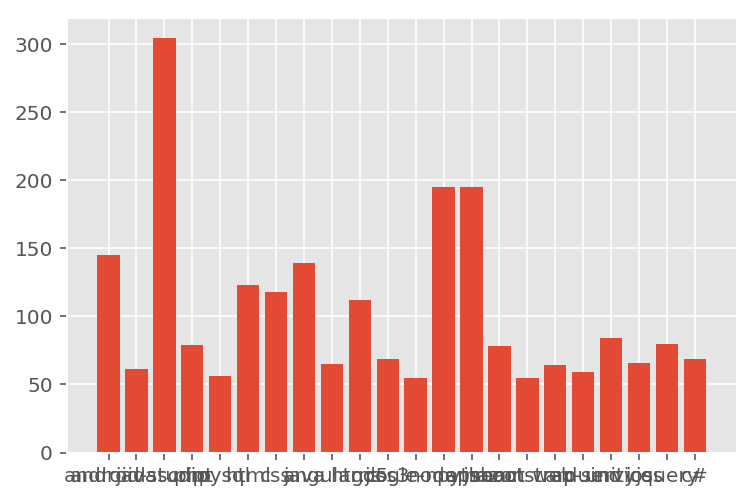

In [344]:
plt.bar(range(len(good_techs)), list(good_techs.values()), align='center')
plt.xticks(range(len(good_techs)), list(good_techs.keys()))

In [358]:
good_keys.append('num_technologies')
good_keys.append('photo_url')
good_keys.append('num_collaborators')
good_keys.append('length')
good_keys.append('is_winner')

reduction = 5
good_keys

['android',
 'android-studio',
 'javascript',
 'php',
 'mysql',
 'html',
 'css',
 'java',
 'angular.js',
 'html5',
 'css3',
 'google-maps',
 'node.js',
 'python',
 'react',
 'bootstrap',
 'amazon-web-services',
 'arduino',
 'unity',
 'ios',
 'jquery',
 'c#',
 'num_technologies',
 'photo_url',
 'num_collaborators',
 'length',
 'is_winner',
 'num_technologies',
 'photo_url',
 'num_collaborators',
 'length',
 'is_winner',
 'num_technologies',
 'photo_url',
 'num_collaborators',
 'length',
 'is_winner']

In [357]:

counter = -1
rows = []
for tech_list in data['tech']:
    row = []
    counter += 1
    num_technologies = 0
    try:
        tech_list = eval(tech_list)      #pop technologies
        num_technologies = len(tech_list)
        for i,key in enumerate(good_keys):
            if i == len(good_keys) - reduction:
                break
            if key in tech_list:
                row.append(1)
            else:
                row.append(0)
        
    except:
        for i in range(len(good_keys) - reduction):
            row.append(0)
      
    row.append(num_technologies)

    if type(data['photo_url'][counter]) == str: #photo
        row.append(1)
    else:
        row.append(0)
    
    try:
        row.append(len(eval(data['members'][counter])))
    except:
        print("ERROR WITH member DATA")
        continue
        
    try:
        l = eval(data['responses'][counter])
        row.append(l[0])
    except:
        print("ERROR WITH RESPONSE DATA")
        continue
    
            
    if str(data['is_winner'][counter]) == 'False':    #pop winner or not
        row.append(0)
    else:
        row.append(1)
    #print("row: ", counter, " ",row)  
    rows.append(row)
        
#print(rows) 
df = pd.DataFrame(rows, columns = good_keys)
df

ERROR WITH member DATA
ERROR WITH member DATA
ERROR WITH member DATA
ERROR WITH member DATA
ERROR WITH member DATA


,android,android-studio,javascript,php,mysql,html,css,java,angular.js,html5,...,num_technologies,photo_url,num_collaborators,length,is_winner,num_technologies,photo_url,num_collaborators,length,is_winner
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,1,1,3555,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1,2,3505,1
2,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,7,1,6,5457,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,7,1,4,4640,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,7,1,4,2557,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,9,1,1,1137,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,1,1,3555,1
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1,2,3505,1
8,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,7,1,6,5457,1
9,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,7,1,4,4640,1


In [351]:
inputs = []
for i,key in enumerate(good_keys):
    if i == len(good_keys)-1:
        break
    inputs.append(key)
    
target = 'is_winner'

In [353]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [354]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
k = 45
model = neighbors.KNeighborsClassifier(k)
model.fit(train[inputs], train[target].ravel())
predicted = model.predict(test[inputs])
print(predicted)

model.score(test[inputs], test[target])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.6007751937984496

In [349]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, df[inputs], df[target],cv = 5)
print("Mean: ", scores.mean())
print(confusion_matrix(test[target], predicted))
print(classification_report(test[target], predicted))

Mean:  0.6130106467801697
[[151  16]
 [ 82   9]]
             precision    recall  f1-score   support

          0       0.65      0.90      0.76       167
          1       0.36      0.10      0.16        91

avg / total       0.55      0.62      0.54       258

